<a href="https://colab.research.google.com/github/JohanMonster/MyRepos/blob/master/PUCHO_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [19]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [0]:
df=pd.read_csv("./Admission_Predict_Ver1.1.csv")

In [26]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [34]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
df.isnull().values.any()

False

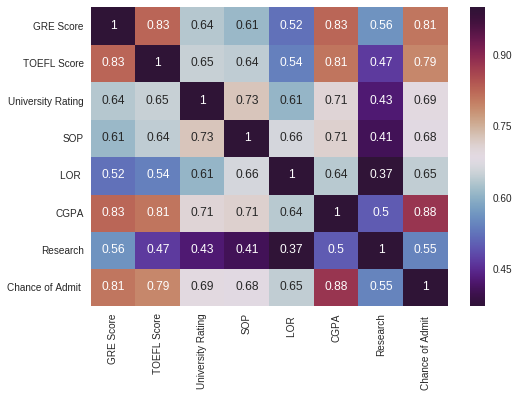

In [32]:
sns.heatmap(df.corr(),annot=True,linecolor='red',cmap='twilight_shifted')

**From  the above heatmap we can see that Chance of admit(target variable) is highly dependent on  CGPA,GRE Score and TOEFL Score.**

In [0]:
target=df[('Chance of Admit ')]

**Line chart showing distribution of Target variable ** 

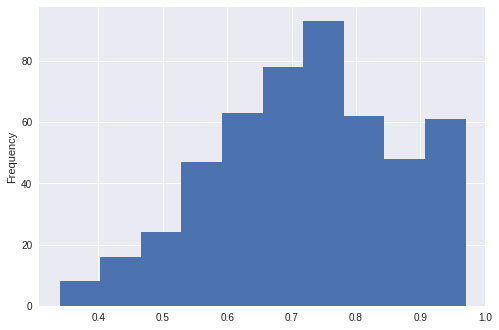

In [33]:
target.plot.hist()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



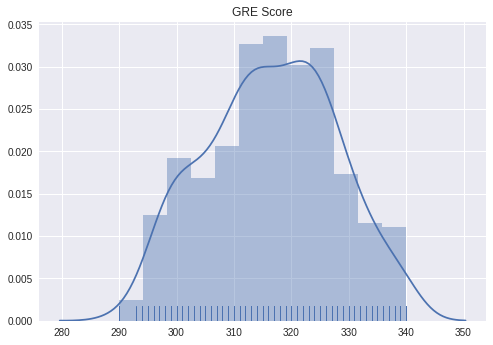

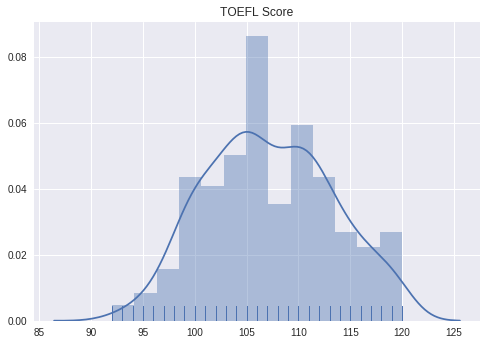

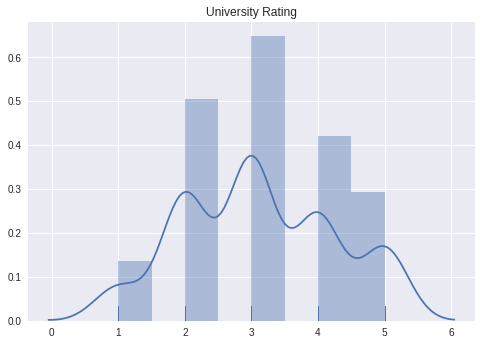

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



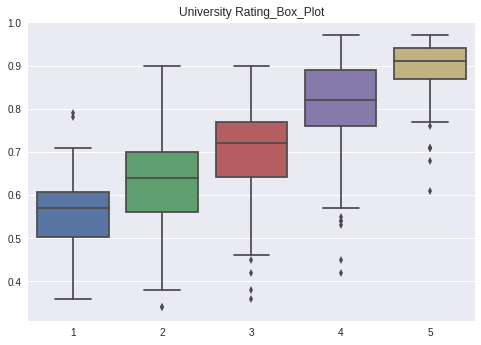

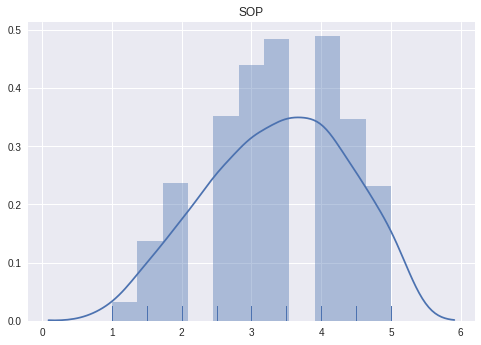

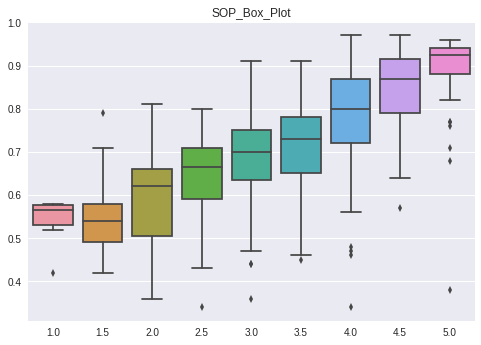

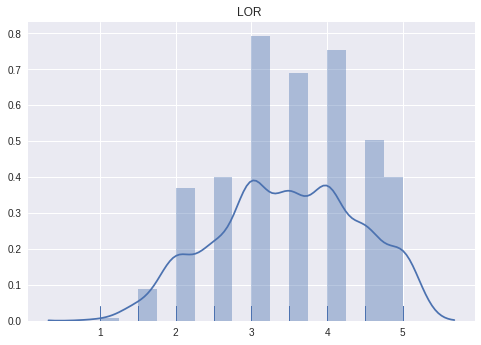

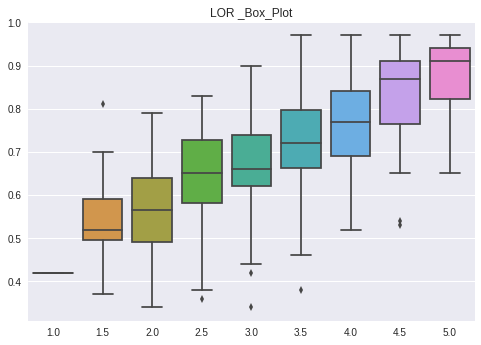

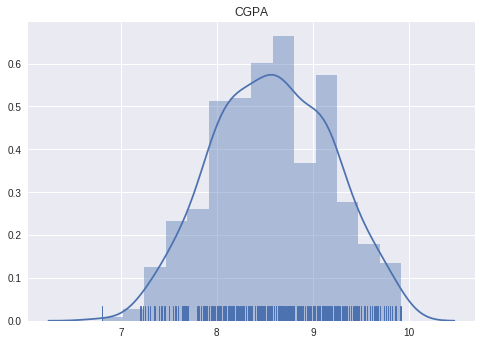

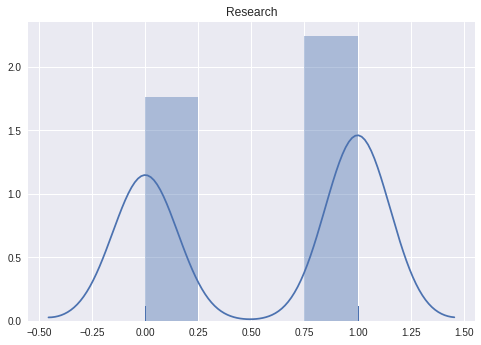

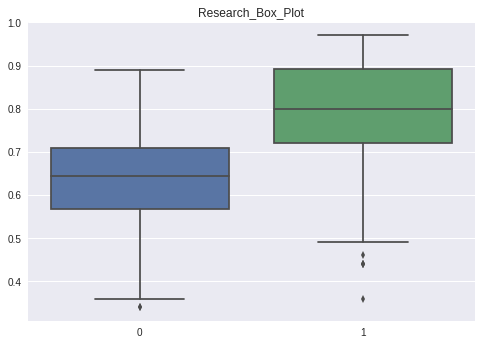

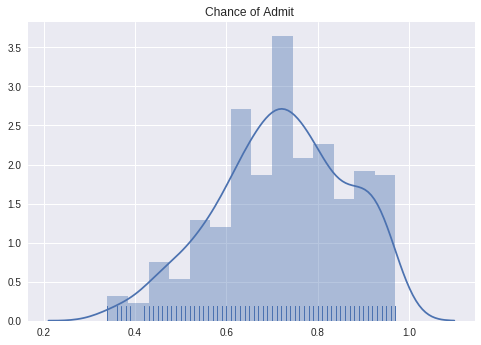

In [71]:
for i in df.columns:
  sns.distplot(df[i].values,rug=True,kde=True)
  plt.title(i)
  plt.show()
  if(i not in ['Chance of Admit ','GRE Score','TOEFL Score','CGPA'] ):
    sns.boxplot(df[i].values,target.values)
    plt.title(i+'_Box_Plot')
    plt.show()

From above figures we can deduce the following:


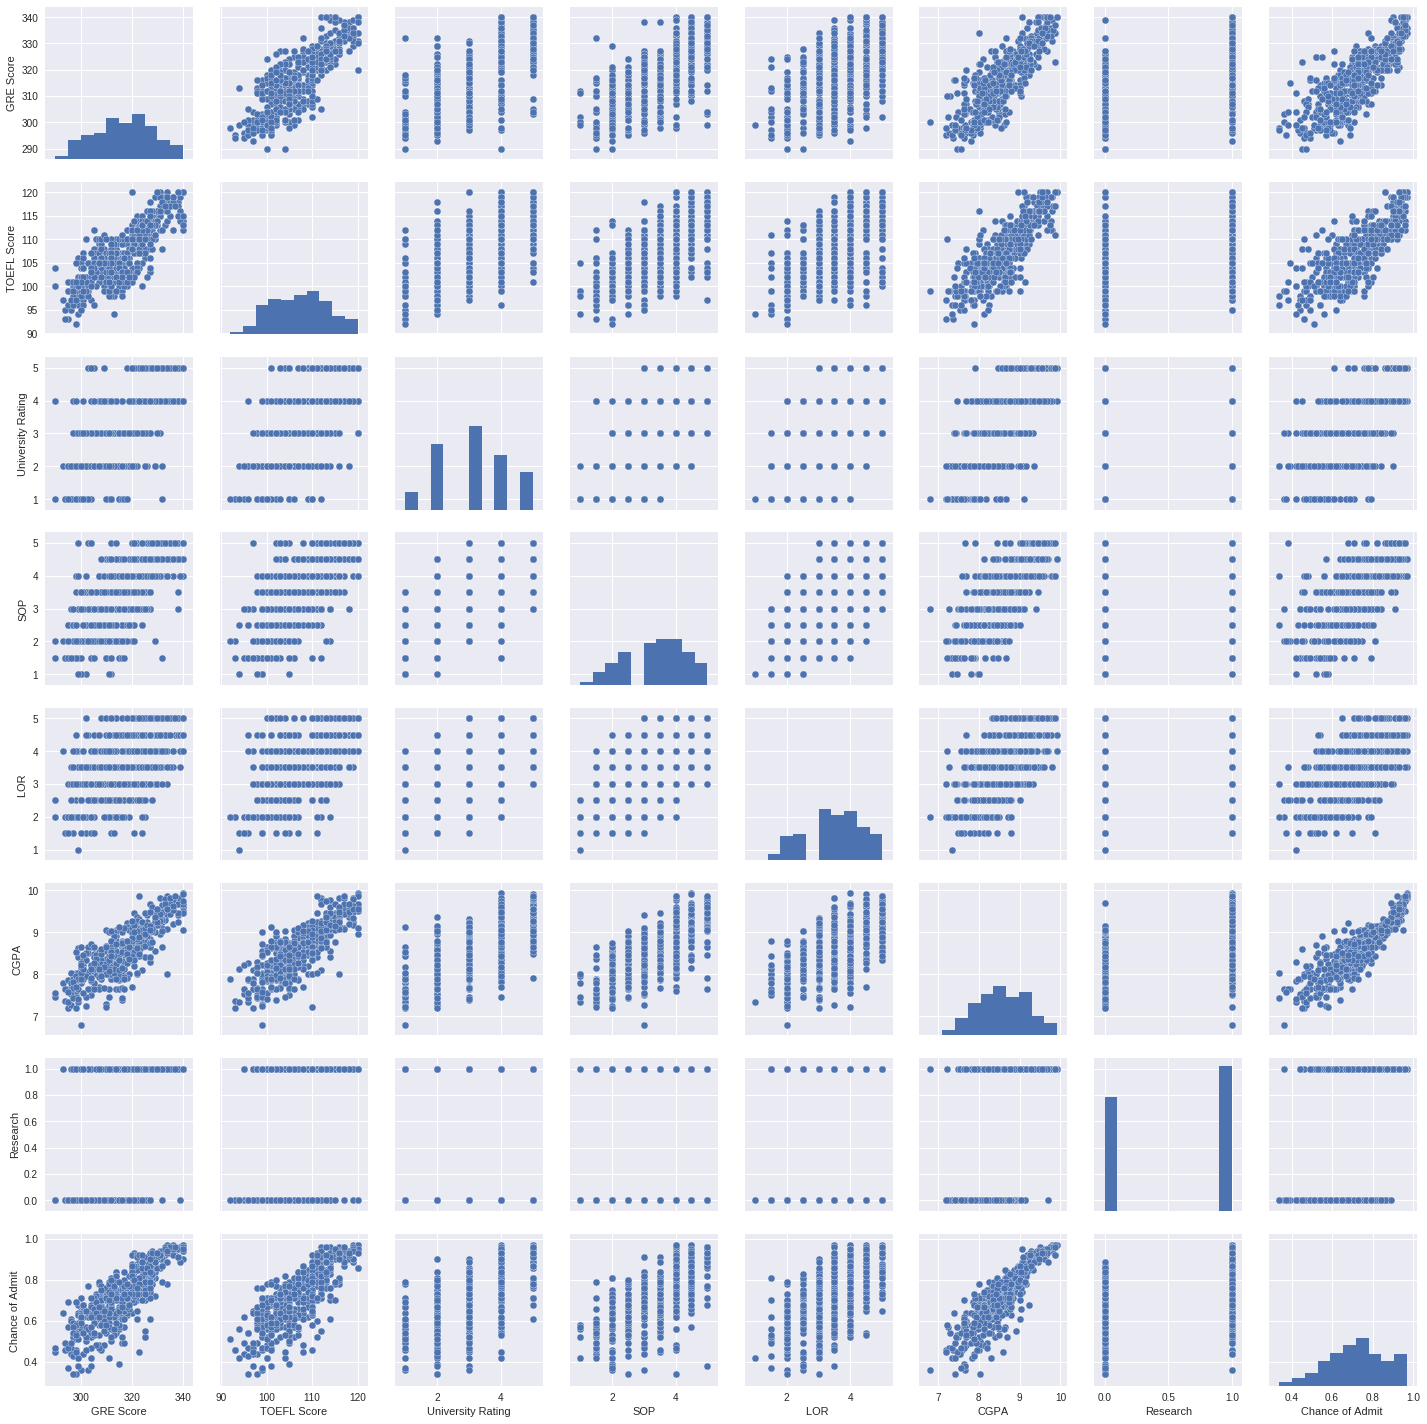

In [67]:
sns.pairplot(df)
plt.show()

**


We will be doing individual analysis of 3 variables that affect the target variable the most : CGPA,GRE Score and TOEFL Score.

**

Following graphs represnt relationship between the above three with as reseach as hue. 




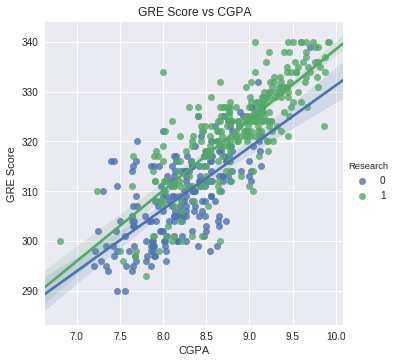

In [83]:

fig = sns.lmplot(x="CGPA", y="GRE Score", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

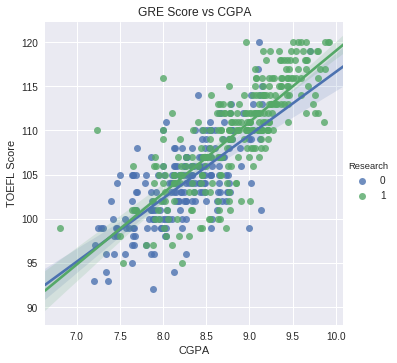

In [84]:
fig = sns.lmplot(x="CGPA", y="TOEFL Score", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()